In [2]:
import tests.generate_tests as test
from copy import deepcopy
import math
from Point import Point
from Rectangle import Rectangle
from visualizer_bit.main import Visualizer
import matplotlib.pyplot as plt
import numpy as np
vis = Visualizer()

In [2]:
import numpy as np
def random_points(n,x,y):
    res=[]
    for _ in range(n):
        res.append((np.random.uniform(0,x),np.random.uniform(0,y)))
    return res

[(100, np.float64(66.70743873819654)), (np.float64(91.6410032996736), 0), (np.float64(56.120407293989686), 100), (100, np.float64(59.57875694742066)), (np.float64(75.44775814062885), 0), (100, np.float64(51.32492907220728)), (0, np.float64(76.03465718434637)), (np.float64(57.31430027664413), 0), (np.float64(77.06155628329765), 100), (np.float64(30.01813095582378), 0), (0, np.float64(71.9956506527489)), (100, np.float64(14.614248530179538)), (0, np.float64(65.03409151288531)), (np.float64(67.4357072771472), 0), (100, np.float64(20.2367995617538)), (100, np.float64(71.77385271072288)), (100, np.float64(77.83248824091538)), (np.float64(80.18686748147229), 0), (np.float64(4.227480293797669), 0), (np.float64(35.62040677087839), 0), (np.float64(48.251362391148035), 0), (np.float64(47.05851045225015), 0), (0, np.float64(80.27592316289861)), (np.float64(42.94603096562306), 100), (np.float64(89.7804950329955), 100), (0, np.float64(56.79809964170096)), (0, np.float64(56.06582204923234)), (100, n

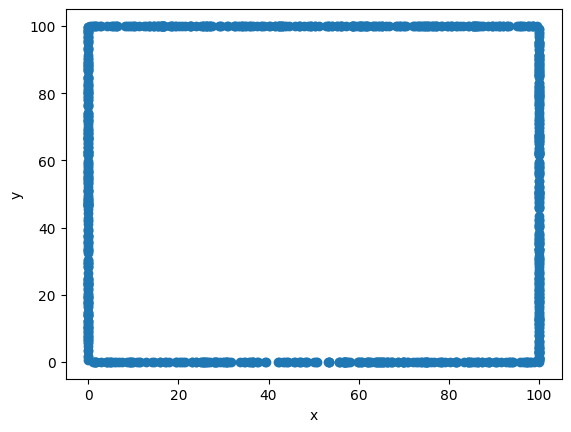

In [3]:
cos = test.generate_random_points_on_rectangle(1000,0,100,0,100)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

[]


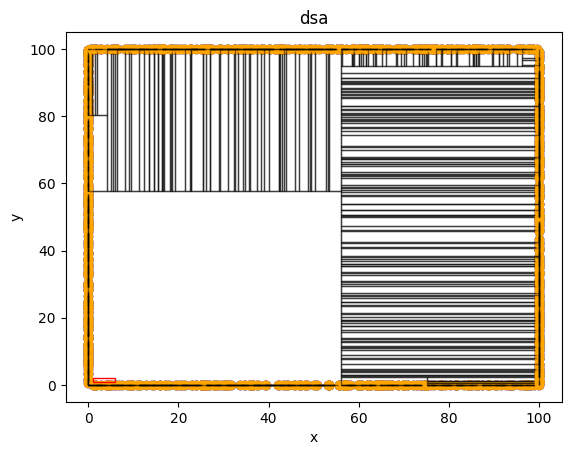

In [4]:
import kd_tree_vis
visual = kd_tree_vis.give_visualization(cos,(1,1),(6,2))
visual.add_title("dsa")
visual.show()

[(45.57292006368556, 0), (0, 29.951787713773356), (0, -32.25958625194565), (-20.022819150705885, 0), (0, 30.17294290013895), (0, -18.73130331066607), (0, -9.255384729464886), (0, -12.016284766565896), (0, 30.578965209900105), (0, 41.37939665546088), (0, -23.319731389600385), (0, 24.87389070695906), (0, -37.56394242513909), (0, 2.229682488492301), (0, 49.20551496401143), (0, 41.48615235662554), (0, -8.823317857273175), (35.63163208384225, 0), (0, 8.694324938389364), (0, 7.404551100421173), (0, -18.20290867261476), (-44.883528532325634, 0), (-27.30688884927276, 0), (-14.631281740993337, 0), (36.29219476653088, 0), (0, 37.89270707225508), (0, -14.52624852917458), (0, 36.829951957420576), (0, 17.283083564527473), (0, -10.56728839448612), (28.759354938066238, 0), (21.019630821398053, 0), (0, 21.996343674538636), (13.825613192490408, 0), (0, 5.12834495841232), (-3.2916456665504796, 0), (0, 41.01344556724902), (0, 9.107293976049156), (-16.796288333316724, 0), (5.012207497596513, 0), (0, -23.7

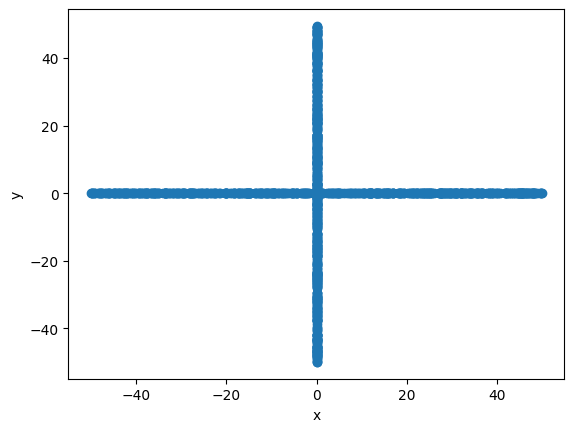

In [3]:
cos = test.cross_on_axes(1000,-50,50,-50,50)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

[]


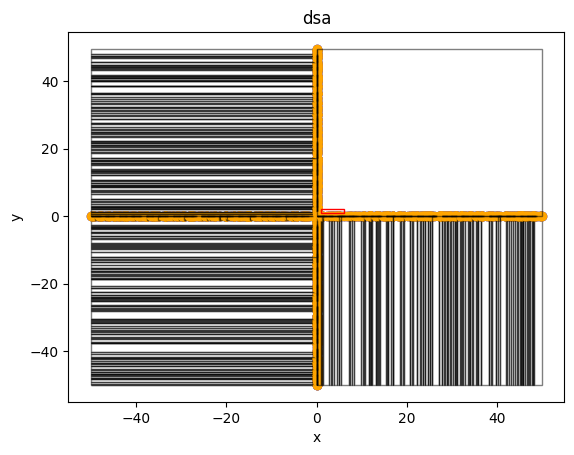

In [4]:
import kd_tree_vis
visual = kd_tree_vis.give_visualization(cos,(1,1),(6,2))
visual.add_title("dsa")
visual.show()

[(np.float64(9.594780252539971), np.float64(8.77939079155843)), (np.float64(10.801146987216422), np.float64(8.387960087262444)), (np.float64(10.647229606053818), np.float64(9.706585554756144)), (np.float64(10.77083467894387), np.float64(10.27225026428849)), (np.float64(11.133479972369205), np.float64(12.288836027039967)), (np.float64(12.241729665792835), np.float64(11.538844563150795)), (np.float64(10.46448910961242), np.float64(12.01594154016139)), (np.float64(10.689438409066197), np.float64(10.244228517738373)), (np.float64(9.270563924599951), np.float64(11.42034529442168)), (np.float64(9.391495969662754), np.float64(10.65379159954008)), (np.float64(8.763652691332132), np.float64(10.306807333703379)), (np.float64(10.357117977999641), np.float64(11.024634212990705)), (np.float64(11.079991644661389), np.float64(8.02768176120016)), (np.float64(10.69147315157498), np.float64(9.470361596100256)), (np.float64(9.42879268844046), np.float64(10.642186084530282)), (np.float64(8.535167266347127

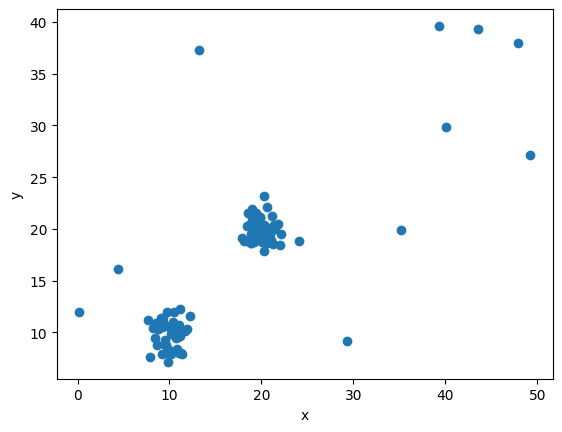

In [2]:
cos = test.add_outliners(10,test.generate_clasters(100,2,0,10,0,10),0,10,0,10)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

[((np.float64(9.42879268844046), np.float64(10.642186084530282))), ((np.float64(9.391495969662754), np.float64(10.65379159954008))), ((np.float64(9.38345546410125), np.float64(10.820116253522617)))]
[((np.float64(9.060583079302871), np.float64(11.404666237039258))), ((np.float64(9.270563924599951), np.float64(11.42034529442168)))]
[((np.float64(10.357117977999641), np.float64(11.024634212990705))), ((np.float64(10.46448910961242), np.float64(12.01594154016139))), ((np.float64(10.48630101904195), np.float64(10.509122225282818))), ((np.float64(11.022413510939217), np.float64(10.687575800701076))), ((np.float64(11.133479972369205), np.float64(12.288836027039967))), ((np.float64(12.241729665792835), np.float64(11.538844563150795))), ((np.float64(18.095158946369665), np.float64(18.78527723332506)))]
[((np.float64(17.838816064608093), np.float64(19.13812665859967))), ((np.float64(18.45079979862274), np.float64(18.853287072429225)))]
[((np.float64(18.465035565739203), np.float64(20.3222825540

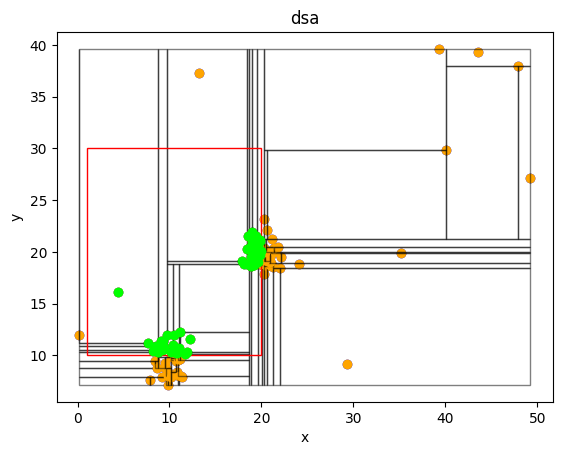

In [6]:
import kd_tree_vis
visual = kd_tree_vis.give_visualization(cos,(1,10),(20,30))
visual.add_title("dsa")
visual.show()

[(np.float64(9.94486007810815), np.float64(-5.759843594591194)), (np.float64(3.2770470928854722), np.float64(18.960220801118638)), (np.float64(25.26910280784465), np.float64(-1.8802723590942247)), (np.float64(6.135701676968952), np.float64(2.5384068800992114)), (np.float64(7.528344280582478), np.float64(-8.627273931755006)), (np.float64(-1.730685166195022), np.float64(9.12228593745715)), (np.float64(20.80020813140075), np.float64(-7.238137941374623)), (np.float64(5.403447073091094), np.float64(4.411875437548723)), (np.float64(15.43010104277106), np.float64(-3.6903422222318163)), (np.float64(-0.13270772501201167), np.float64(-2.346926784930084)), (np.float64(-19.811881368609004), np.float64(11.529597846290798)), (np.float64(8.494111715566802), np.float64(5.64552106588364)), (np.float64(-5.53670185916153), np.float64(-2.2646662639303514)), (np.float64(15.675455679991087), np.float64(6.403824835091599)), (np.float64(0.4887430894999564), np.float64(-4.345762117057729)), (np.float64(14.0248

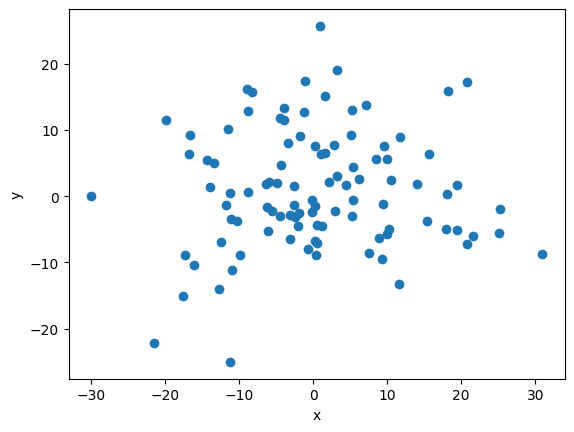

In [8]:
cos = test.generate_standard_distribution(100,1,1,10,10)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

[(np.float64(1.6103069027578056), np.float64(15.134509488043383)), (np.float64(5.229413831252523), np.float64(12.952308798959294)), (np.float64(3.2770470928854722), np.float64(18.960220801118638)), (np.float64(7.163480778777646), np.float64(13.736395030058308)), (np.float64(18.22011530341376), np.float64(15.853791057366347))]


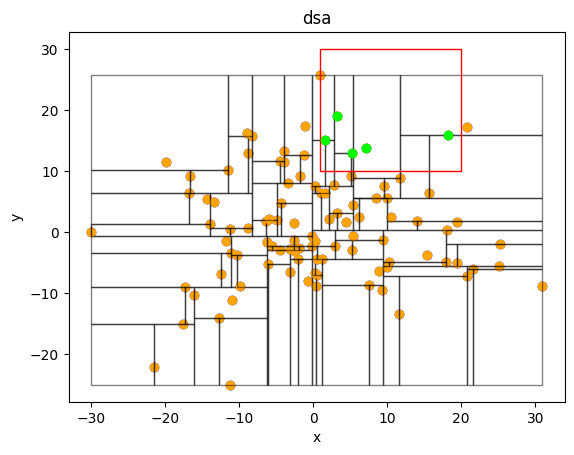

In [9]:
import kd_tree_vis
visual = kd_tree_vis.give_visualization(cos,(1,10),(20,30))
visual.add_title("dsa")
visual.show()

In [5]:
from kd_tree import KdTree
testa = test.generate_multidimensional_cluster(5,2,10,4)
print(testa)
a = KdTree(testa,4)
print(a.root.print_tree())

print(a.search_in_recangle(((-3,0,0,0),(10,10,10,10))))
for poin in testa:
    print(a.check_contains(poin))
#chyba działa

[[3.89010524 4.83815727 6.4251135  6.40612433]
 [4.5081745  4.4912448  5.06280038 0.51373279]
 [3.35151796 4.04070155 1.90598117 5.23059927]
 [4.65033053 7.33578852 6.98825    3.92517239]
 [2.37526306 4.73636113 4.25446768 3.8311591 ]
 [8.497029   6.08824535 4.61777535 4.07084664]
 [6.17912312 6.77245639 4.55452484 2.73318714]
 [6.54240894 3.21073672 9.21548007 5.56399029]
 [8.11676623 4.05284353 5.3468146  4.96596821]
 [3.32533712 8.89822601 6.30527499 6.62202335]]
[] 0 (ro jest prostokąt([np.float64(2.3752630604883556), np.float64(3.210736719372383), np.float64(1.9059811675683918), np.float64(0.5137327945976278)])),([np.float64(8.497029000880428), np.float64(8.898226013684077), np.float64(9.215480067723082), np.float64(6.622023349589264)])
[([3.35151796 4.04070155 1.90598117 5.23059927]), ([4.5081745  4.4912448  5.06280038 0.51373279]), ([2.37526306 4.73636113 4.25446768 3.8311591 ]), ([3.89010524 4.83815727 6.4251135  6.40612433]), ([3.32533712 8.89822601 6.30527499 6.62202335])] 1 